In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('drive/MyDrive/indonesian_vaccination_tweets.csv')
df.head()

,id,date,text,hashtags,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,source,retweets,favorites,is_retweet,reply_to_status
0,1348286903527768065,2021-01-10 15:13:42,#vaksin untuk #indonesia https://t.co/URgujrcKUn,"['vaksin', 'indonesia']",Ns. Bayu Aji Sismanto,"Bekasi, Jawa Barat",#nurseendoscopy #gastroenterology #pulmonology...,2012-04-22 04:00:39,214,627,1771,False,Twitter for Android,0,1,False,NaN
1,1348302168248340481,2021-01-10 16:14:21,Tak Kenal maka Tak Kebal. Vaksin menjadi bukti...,NaN,DiskominfoKotaBogor,Kota Bogor - Jawa Barat,Akun twitter resmi Dinas Komunikasi dan Inform...,2014-05-06 02:08:47,4617,203,38,False,Twitter for iPhone,0,0,False,NaN
2,1348307055040348160,2021-01-10 16:33:46,Sistem satu data mendukung Vaksinasi di Indone...,"['Vaksin', 'Covid19', 'CoronaVirus', 'Kesehatan']",Indah Nur Hidayah,NaN,NaN,2020-11-25 03:24:19,10,22,38,False,Twitter Web App,0,0,False,NaN
3,1348322660925669377,2021-01-10 17:35:47,https://t.co/Te1d94JHHM\nSiap menerima vaksin ...,"['vaksinhalal', 'vaksinsiap34propinsi', 'vaksi...",lemahku,NaN,"lemahku, dark side, toxic, and anything negati...",2020-11-30 13:07:42,3,158,10,False,Twitter for Android,0,0,False,NaN
4,1348425614584266753,2021-01-11 00:24:53,Apa Perbedaan Vaksin China Sinovac dan Sinopha...,"['Vaksin', 'Perusahaanfarmasi', 'Virus', 'Farm...",BaBe - Baca Berita,Indonesia,Aku resmi BaBe - Aplikasi berita pintar yang m...,2014-01-23 08:06:14,5128,48,95,False,BaBe,0,0,False,NaN


In [4]:
tweet = df['text']
tweet = pd.DataFrame(tweet)
tweet.head()
tweet

,text
0,#vaksin untuk #indonesia https://t.co/URgujrcKUn
1,Tak Kenal maka Tak Kebal. Vaksin menjadi bukti...
2,Sistem satu data mendukung Vaksinasi di Indone...
3,https://t.co/Te1d94JHHM\nSiap menerima vaksin ...
4,Apa Perbedaan Vaksin China Sinovac dan Sinopha...
...,...
13486,Wah @bank_sinarmas dan @as_sinarmas hebat juga...
13487,Kunci Pemulihan Ekonomi adalah Ketersediaan Va...
13488,#bandartogelonline #bocorantogel #angkajitu #p...
13489,Kepada seluruh wanita Indonesia \n\nSELAMAT HA...


In [5]:
tweet.shape

(13491, 1)

In [6]:
tweet.dropna(inplace=True)

Pre processing data tweets

In [7]:
import string
import re

In [8]:
def dropna(tweet) :
  return tweet.dropna(inplace=True)

def remove_duplicate(tweet) :
  return tweet.drop_duplicates(subset='text',inplace=True)

def remove_tweet_special(tweet):
  # remove tab, new line, ans back slice
  tweet = re.sub('\s+',' ',tweet)
  # remove non ASCII (emoticon, chinese word, .etc)
  tweet = tweet.encode('ascii', 'replace').decode('ascii')
  # remove mention, link, hashtag
  # tweet = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", tweet).split())
  # remove incomplete URL
  return re.sub(r'http\S+', '', tweet)

def lower_case(tweet) :
  return tweet.lower()

def remove_punctuation(tweet):
  return tweet.translate(str.maketrans("","",string.punctuation))

def remove_number(tweet) :
  return re.sub(r"\d+", "", tweet)

def remove_singl_char(tweet):
  return re.sub(r"\b[a-zA-Z]\b", "", tweet)

def remove_whitespace_LT(tweet):
  return tweet.strip()

def remove_whitespace_multiple(tweet):
  return re.sub('\s+',' ',tweet)

def replaceThreeOrMore(tweet):
    # (contoh goool -> gool).
  pattern = re.compile(r"(.)\1{1,}", re.DOTALL)
  return pattern.sub(r"\1\1", tweet)

In [9]:
dropna(tweet)
remove_duplicate(tweet)

In [10]:
tweet['text'] = tweet['text'].apply(remove_tweet_special)
tweet['text'] = tweet['text'].apply(lower_case)
tweet['text'] = tweet['text'].apply(remove_punctuation)
tweet['text'] = tweet['text'].apply(remove_number)
tweet['text'] = tweet['text'].apply(remove_singl_char)
tweet['text'] = tweet['text'].apply(remove_whitespace_LT)
tweet['text'] = tweet['text'].apply(remove_whitespace_multiple)
tweet['text'] = tweet['text'].apply(replaceThreeOrMore)
tweet.head()

,text
0,vaksin untuk indonesia
1,tak kenal maka tak kebal vaksin menjadi bukti ...
2,sistem satu data mendukung vaksinasi di indone...
3,siap menerima vaksin covid vaksinhalal vaksins...
4,apa perbedaan vaksin china sinovac dan sinopha...


In [11]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [12]:
def word_tokenize_wrapper(tweet):
  return word_tokenize(tweet)

In [13]:
tweet['text'] = tweet['text'].apply(word_tokenize_wrapper)
tweet.head()

,text
0,"[vaksin, untuk, indonesia]"
1,"[tak, kenal, maka, tak, kebal, vaksin, menjadi..."
2,"[sistem, satu, data, mendukung, vaksinasi, di,..."
3,"[siap, menerima, vaksin, covid, vaksinhalal, v..."
4,"[apa, perbedaan, vaksin, china, sinovac, dan, ..."


In [14]:
sheet_id = '1ke3yJfIB0OsZZBK5rD8dJX4pxRWsA84UG_RVMNVrs9s'

df = pd.read_csv(f'https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv')
df.head()

,before,after
0,gua,saya
1,gw,saya
2,mngkn,mungkin
3,prnh,pernah
4,brdsrkn,berdasarkan


In [15]:
normalized_word = pd.Series(df.after.values,index=df.before).to_dict()

In [16]:
normalized_word

{'adek': 'adik',
 'adl': 'ada',
 'ah': 'mengeluh',
 'aing': 'saya',
 'aja': 'saja',
 'ajadeeh': 'saja',
 'ajadeh': 'saja',
 'aje': 'saja',
 'ajg': 'anjing',
 'ak': 'saya',
 'akeh': 'banyak',
 'aktip': 'aktif',
 'anggep': 'anggap',
 'anteri': 'antre',
 'antri': 'antre',
 'apotik': 'apotek',
 'aq': 'saya',
 'ashiap': 'siap',
 'ashiiaap': 'siap',
 'ashiiap': 'siap',
 'asw': 'anjing',
 'asyik': 'menyenangkan',
 'awkay': 'oke',
 'babang': 'abang',
 'becanda': 'bercanda',
 'begaul': 'bergaul',
 'bego': 'bodoh',
 'bergaul': 'berkumpul',
 'bgi': 'bagi',
 'bhya': 'bahaya',
 'bkap': 'ayah',
 'bkar': 'bakar',
 'bljr': 'belajar',
 'bnr': 'benar',
 'bntuk': 'bentuk',
 'bokap': 'ayah',
 'brdsrkn': 'berdasarkan',
 'brg': 'bersama',
 'brsh': 'bersih',
 'brsih': 'bersih',
 'brti': 'berarti',
 'buangb': 'buang',
 'bucin': 'budak cinta',
 'bund': 'bunda',
 'bup': 'bupati',
 'cabut': 'pergi',
 'cacarair': 'cacar air',
 'ceker': 'kaki',
 'cewek': 'wanita',
 'cintaa': 'cinta',
 'ckck': 'tertawa',
 'ckckck':

In [17]:
normalized_word_list = {
"@": "di", "abis": "habis", "ad": "ada", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin", "gw" : "saya", "gue" : "saya", "gua" : "saya", "urang" : "saya", "aing" : "saya", "ibuibu" : "ibu", "yuk" : "ayo", "psstikan" : "pastikan", "pstikan" : "pastikan", "katakata" : "kata", "ok" : "baiklah", "yaa" : "iya", "support" : "dukung", "suport" : "dukung", "prgrm" : "program", "yuks" : "ayo", "yukz" : "ayo", "prnh" : "pernah", "sehad" : "sehat", "endonesia" : "indonesia", "ind" : "indonesia", "tampa" : "tanpa", "tnpa" : "tanpa", "dkung" : "dukung", "mntri" : "menteri", "mentri" : "menteri", "sans" : "tenang", "santuy" : "tenang", "kuy" : "ayo", "skuy" : "ayo", "sanz" : "tenang", "bopong" : "angkat", "follow" : "ikuti",


"vaksinhalal" : "vaksin halal",
"vaksincorona" : "vaksinasi",
"vaksin" : "vaksinasi",
"paksin" : "vaksinasi",
"covid" : "corona virus",
"kopit" : "corona virus",
"kopid" : "corona virus",
"kopet" : "corona virus",
"covidot" : "corona virus",
"vaksincovid" : "vaksinasi corona virus",
"coronavirus" : "corona virus",
"viruscorona" : "corona virus",
"novelcoronavirus" : "corona virus",
"indonesiakuat" : "indonesia kuat",
"indonesiamenang" : "indonesia menang",
"indonesiasehat" : "indonesia sehat",
"mutasibaru" : "mutasi baru",
"varianbaru" : "varian baru",
"dirumahaja" : "di rumah saja",
"tetapdirumahaja" : "tetap di rumah saja",
"vaksinasinasional" : "vaksinasi nasional",
"pepekkm" : "ppkm",
"pepekm" : "ppkm",
"lawancovid" : "lawan corona virus",
"vaksinamanhalal" : "vaksinasi aman halal"
}

In [18]:
normalized_word_fix = {**normalized_word_list, **normalized_word}
print(normalized_word_fix)

{'@': 'di', 'abis': 'habis', 'ad': 'ada', 'adlh': 'adalah', 'afaik': 'as far as i know', 'ahaha': 'haha', 'aj': 'saja', 'ajep-ajep': 'dunia gemerlap', 'ak': 'saya', 'akika': 'aku', 'akkoh': 'aku', 'akuwh': 'aku', 'alay': 'norak', 'alow': 'halo', 'ambilin': 'ambilkan', 'ancur': 'hancur', 'anjrit': 'anjing', 'anter': 'antar', 'ap2': 'apa-apa', 'apasih': 'apa sih', 'apes': 'sial', 'aps': 'apa', 'aq': 'saya', 'aquwh': 'aku', 'asbun': 'asal bunyi', 'aseekk': 'asyik', 'asekk': 'asyik', 'asem': 'asam', 'aspal': 'asli tetapi palsu', 'astul': 'asal tulis', 'ato': 'atau', 'au ah': 'tidak mau tahu', 'awak': 'saya', 'ay': 'sayang', 'ayank': 'sayang', 'b4': 'sebelum', 'bakalan': 'akan', 'bandes': 'bantuan desa', 'bangedh': 'banget', 'banpol': 'bantuan polisi', 'banpur': 'bantuan tempur', 'basbang': 'basi', 'bcanda': 'bercanda', 'bdg': 'bandung', 'begajulan': 'nakal', 'beliin': 'belikan', 'bencong': 'banci', 'bentar': 'sebentar', 'ber3': 'bertiga', 'beresin': 'membereskan', 'bete': 'bosan', 'beud': 

In [19]:
def normalized_term(document):
  return [normalized_word_fix[term] if term in normalized_word_fix else term for term in document]

In [20]:
tweet['text'] = tweet['text'].apply(normalized_term)
tweet.tail(30)

,text
13461,"[satuan, tugas, satgas, penanganan, corona vir..."
13462,"[pendaftaran, vaksinasi, corona virus, khusus,..."
13463,"[dinas, kominfo, dan, statistika, telah, memil..."
13464,"[persen, warga, terdata, sudah, divaksin, gtgt..."
13465,"[tim, satgas, penanganan, corona virus, bandar..."
13466,"[hai, teman, penyintas, atau, survivor, corona..."
13467,"[dukung, pelaksanaan, vaksinasi, mandiri, indo..."
13468,"[dukung, pelaksanaan, vaksinasi, mandiri, indo..."
13469,"[dukung, pelaksanaan, vaksinasi, mandiri, indo..."
13470,"[wakil, ketua, mpr, lestari, moerdijat, menila..."


In [21]:
from nltk.tokenize.treebank import TreebankWordDetokenizer

In [22]:
def unTokenize(tweet) :
  return TreebankWordDetokenizer().detokenize(tweet)

In [23]:
tweet['text'] = tweet['text'].apply(unTokenize)
tweet['text'] = tweet['text'].apply(word_tokenize_wrapper)

In [24]:
from nltk.corpus import stopwords
nltk.download('stopwords')
list_stopwords = stopwords.words('indonesian')

list_stopwords.extend(['vaksin', 'vaksinasi', 'corona', 'virus'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [25]:
print(list_stopwords)

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan'

In [26]:
list_stopwords = set(list_stopwords)
exclude_words = {"tidak", "bukan", "jangan"}
new_stop_words = list_stopwords.difference(exclude_words)

def stopwords_removal(tweet):
  return [tweets for tweets in tweet if tweets not in new_stop_words]

tweet['text'] = tweet['text'].apply(stopwords_removal)
tweet.tail()

,text
13486,"[banksinarmas, assinarmas, hebat, idenya, ngad..."
13487,"[kunci, pemulihan, ekonomi, ketersediaan, baca..."
13488,"[bandartogelonline, bocorantogel, angkajitu, p..."
13489,"[wanita, indonesia, selamat, kartini, kapoldaj..."
13490,"[informasi, kondisi, indonesia, kartini, sehat..."


In [27]:
!pip install Sastrawi
!pip install swifter

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in tweet['text']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '


for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

tweet['text'] = tweet['text'].swifter.apply(get_stemmed_term)

     |████████████████████████████████| 209 kB 5.2 MB/s 
     |████████████████████████████████| 296 kB 5.2 MB/s 
     |████████████████████████████████| 119 kB 51.3 MB/s 
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


Output streaming akan dipotong hingga 5000 baris terakhir.
mlkukan : mlkukan
kakek : kakek
nenek : nenek
gejalanya : gejala
berjamjam : berjamjam
kembangan : kembang
jurnaljatim : jurnaljatim
eksekutif : eksekutif
lsi : lsi
djayadi : djayadi
hanan : hanan
formulir : formulir
sebak : sebak
touchdown : touchdown
pramugari : pramugari
shazni : shazni
shazwani : shazwani
kongsikan : kongsi
detik : detik
penjaringan : jaring
depika : depika
mengancam : ancam
mogok : mogok
koreaselatan : koreaselatan
covertempo : covertempo
livetvtempo : livetvtempo
majalahtempo : majalahtempo
radioelshinta : radioelshinta
elshintabandung : elshintabandung
mediakonsumenid : mediakonsumenid
mediaindonesia : mediaindonesia
nanang : nanang
fitra : fitra
aulia : aulia
un : un
utomo : utomo
tetapkan : tetap
menelepon : telepon
skenario : skenario
terburuk : buruk
terlewati : lewat
himatemiaberaksi : himatemiaberaksi
himatemiago : himatemiago
cucuk : cucuk
bcg : bcg
vacc : vacc
lenguh : lenguh
letih : letih
etc : 

Pandas Apply:   0%|          | 0/13467 [00:00<?, ?it/s]

In [28]:
tweet['text'] = tweet['text'].apply(unTokenize)
tweet.head()

,text
0,indonesia
1,tidak kenal tidak kebal bukti manusia juang ja...
2,sistem data dukung indonesia sehat
3,terima halal vaksinsiappropinsi vaksicovid jok...
4,beda china sinovac sinopharm merek perusahaanf...


In [29]:
dropna(tweet)
remove_duplicate(tweet)

In [30]:
tweet.isna().sum()

text    0
dtype: int64

In [31]:
tweet.shape

(11020, 1)

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [33]:
vector = CountVectorizer()
tf_idf = TfidfTransformer()

tweet_vector = vector.fit_transform(tweet.text)
tweet_tf_idf = tf_idf.fit_transform(tweet_vector)

In [34]:
tweet_vector.shape

(11020, 11065)

In [35]:
from sklearn.cluster import KMeans

In [36]:
dist = []
rand_state = 2021
jml_cluster = range(1,10)
for clr in jml_cluster:
    kmeanModel = KMeans(n_clusters=clr, random_state = rand_state)
    mod = kmeanModel.fit(tweet_tf_idf)
    elbow = dist.append(kmeanModel.inertia_)

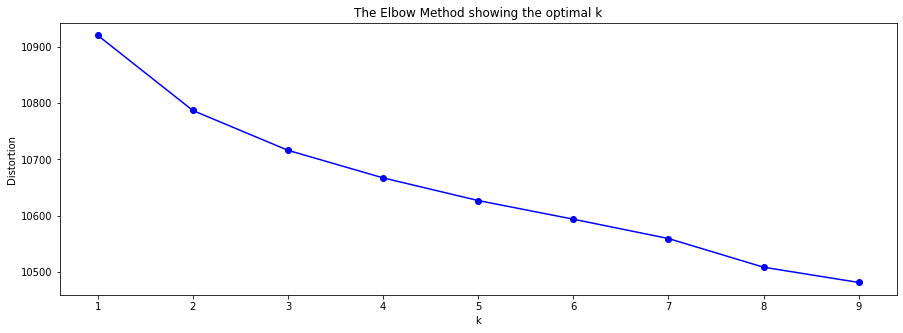

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(jml_cluster, dist, 'bo-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [50]:
clustering = KMeans(n_clusters = 2, random_state = rand_state)
model = clustering.fit(tweet_tf_idf)

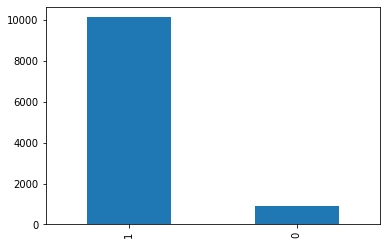

In [51]:
hasil = model.labels_
plotting = pd.value_counts(hasil)
plotting.plot(kind='bar')

In [52]:
tweet['cluster'] = hasil
tweet.head()

,text,cluster
0,indonesia,0
1,tidak kenal tidak kebal bukti manusia juang ja...,1
2,sistem data dukung indonesia sehat,0
3,terima halal vaksinsiappropinsi vaksicovid jok...,1
4,beda china sinovac sinopharm merek perusahaanf...,1


In [54]:
cluster_0 = tweet[tweet.cluster == 0]
cluster_1 = tweet[tweet.cluster == 1]
# cluster_2 = tweet[tweet.cluster == 2]

In [55]:
from wordcloud import WordCloud, STOPWORDS

Analisa Tweet Keseluruhan


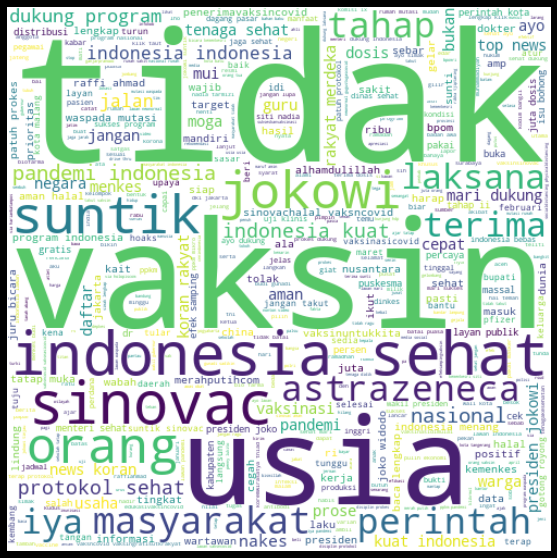

In [56]:
all_words       = ' '.join([tweets for tweets in tweet['text']])
word_cloud      = WordCloud(background_color="white", max_words=2000, stopwords=STOPWORDS, max_font_size=256, random_state=42, width=500, height=500)
word_cloud_pict = word_cloud.generate(all_words)

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(word_cloud_pict, interpolation="bilinear")
plt.axis('off')
plt.show()

Analisa Tweet pada Cluster 0

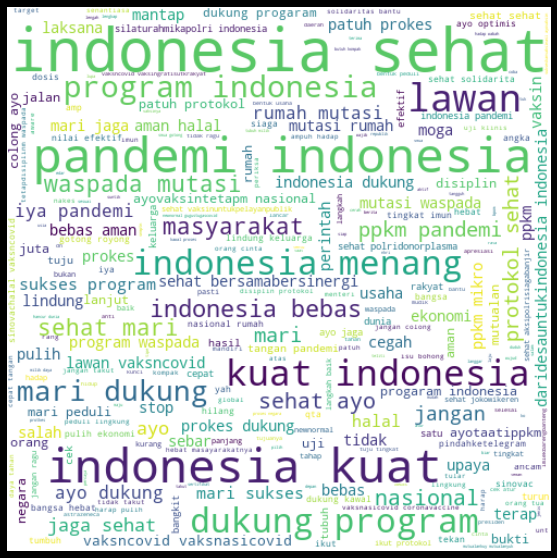

In [57]:
all_words       = ' '.join([tweets for tweets in cluster_0['text']])
word_cloud      = WordCloud(background_color="white", max_words=2000, stopwords=STOPWORDS, max_font_size=256, random_state=42, width=500, height=500)
word_cloud_pict = word_cloud.generate(all_words)

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(word_cloud_pict, interpolation="bilinear")
plt.axis('off')
plt.show()

Analisa Tweet pada Cluster 1

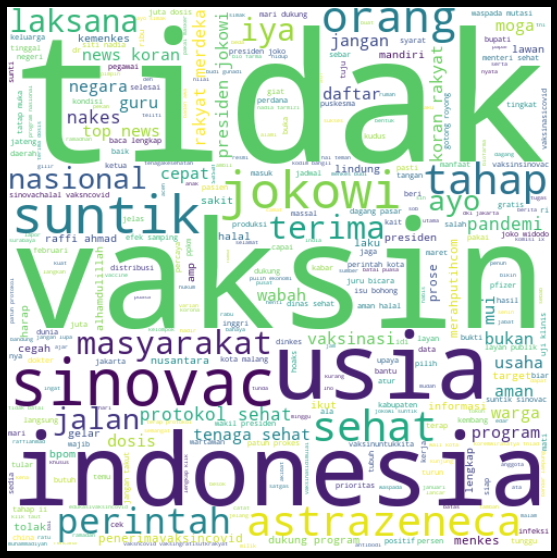

In [58]:
all_words       = ' '.join([tweets for tweets in cluster_1['text']])
word_cloud      = WordCloud(background_color="white", max_words=2000, stopwords=STOPWORDS, max_font_size=256, random_state=42, width=500, height=500)
word_cloud_pict = word_cloud.generate(all_words)

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(word_cloud_pict, interpolation="bilinear")
plt.axis('off')
plt.show()

Analisa Tweet pada Cluster 2

In [59]:
# all_words       = ' '.join([tweets for tweets in cluster_2['text']])
# word_cloud      = WordCloud(background_color="white", max_words=2000, stopwords=STOPWORDS, max_font_size=256, random_state=42, width=500, height=500)
# word_cloud_pict = word_cloud.generate(all_words)

# plt.figure( figsize=(20,10), facecolor='k')
# plt.imshow(word_cloud_pict, interpolation="bilinear")
# plt.axis('off')
# plt.show()

In [62]:
cluster_1.head(50)

,text,cluster
1,tidak kenal tidak kebal bukti manusia juang ja...,1
3,terima halal vaksinsiappropinsi vaksicovid jok...,1
4,beda china sinovac sinopharm merek perusahaanf...,1
5,obat selamat nyawa pasien temu infus wabah radang,1
6,buat tiongkok orang tua tidak suntik nonton vi...,1
7,kabar duka dokter pribadi paus fransiskus ting...,1
8,masker bekas rawan tular pakai masker cegah ma...,1
9,wakil supervisor kabkota latih rumah sakit kab...,1
10,kenal,1
11,top news koran rakyat merdeka jelang imlek chi...,1


In [48]:
import numpy as np

In [49]:
s = np.array(cluster_2)